In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
test_data = np.genfromtxt('/data9/UN3400/data/LS_test_data.txt', 
                          delimiter='\t')

In [4]:
test_data

array([[0.        , 0.47417147],
       [0.1       , 0.58643956],
       [0.2       , 0.73873309],
       [0.3       , 0.91399716],
       [0.4       , 0.88277852],
       [0.5       , 1.16527602],
       [0.6       , 1.27499279],
       [0.7       , 1.43132115],
       [0.8       , 1.77207039],
       [0.9       , 1.92082211],
       [1.        , 2.29870771]])

In [5]:
N, i = np.shape(test_data)

In [13]:
t = test_data[:,0:1]
t
dobs = test_data[:,1:2]
dobs

array([[0.47417147],
       [0.58643956],
       [0.73873309],
       [0.91399716],
       [0.88277852],
       [1.16527602],
       [1.27499279],
       [1.43132115],
       [1.77207039],
       [1.92082211],
       [2.29870771]])

In [18]:
M = 2
G = np.zeros((N,M))
G[0:N,0:1] = np.ones((N,1))
G[0:N,1:2] = t
# G[0:N,2:3] = t**2
G

array([[1. , 0. ],
       [1. , 0.1],
       [1. , 0.2],
       [1. , 0.3],
       [1. , 0.4],
       [1. , 0.5],
       [1. , 0.6],
       [1. , 0.7],
       [1. , 0.8],
       [1. , 0.9],
       [1. , 1. ]])

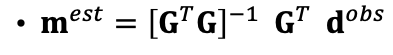

In [21]:
GTG = np.matmul(G.T,G)
GTd = np.matmul(G.T,dobs)
mest = np.linalg.lstsq(GTG,GTd,rcond=None)[0]   
mest

array([[0.36052429],
       [1.72609869]])

In [23]:
dpre = np.matmul(G,mest)
e = dobs - dpre
sigmad2 = np.matmul(e.T,e)/(N-M)
Cd = sigmad2 * np.linalg.inv(GTG)
sm = np.sqrt( np.diag(Cd).reshape(-1,1) )
sm

array([[0.06762468],
       [0.11430657]])

In [24]:
print("estimated standard deviation of the data")
print(np.sqrt(sigmad2))

estimated standard deviation of the data
[[0.11988575]]


In [25]:
print("estimated solution of model parameters")
for k in range(M):
    print("model parameter %d: %.4f +/- %.4f" % (k, mest[k,0], 2.0*sm[k,0]) )

estimated solution of model parameters
model parameter 0: 0.3605 +/- 0.1352
model parameter 1: 1.7261 +/- 0.2286


Text(0.5, 1.0, 'data: observed (black), predicted (red)')

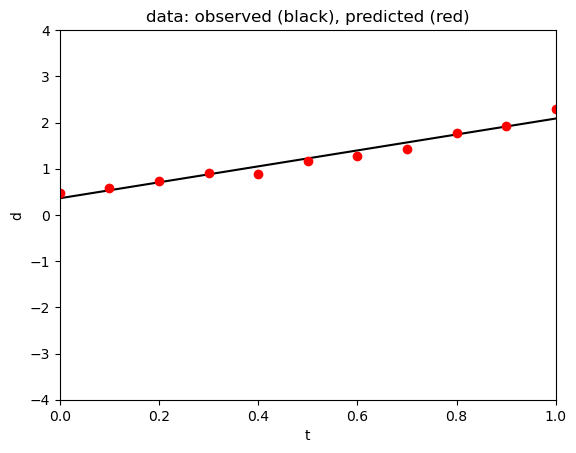

In [26]:
fig,ax = plt.subplots()
plt.axis([np.min(t), np.max(t), -4,4] )
plt.plot(t,dpre, 'k-')
plt.plot(t,dobs,'ro')
plt.xlabel('t')
plt.ylabel('d')
plt.title('data: observed (black), predicted (red)') 

Text(0.5, 1.0, 'prediction error')

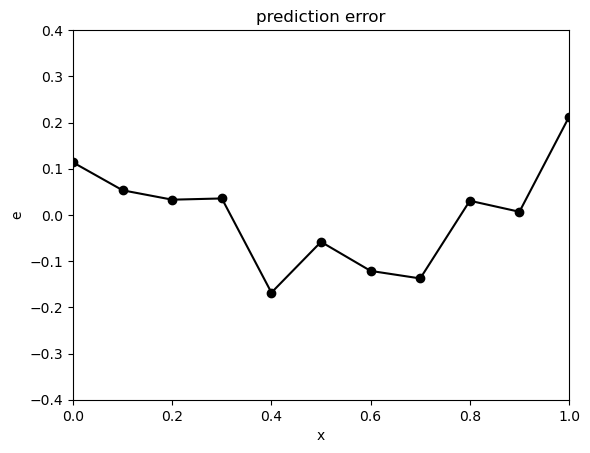

In [28]:
fig,ax = plt.subplots()
plt.axis([np.min(t), np.max(t), -0.4,0.4] )
plt.plot(t,e,'ko-')
plt.xlabel('x')
plt.ylabel('e')
plt.title('prediction error')


In [40]:
from scipy import optimize

def linfunc(x, a, b,c,d):
    y = a*x + b*x**2 + c*x**3 + d
    return y


In [41]:
mest_ez = optimize.curve_fit(linfunc, xdata = test_data[:,0], 
                             ydata = test_data[:,1])[0]
mest_ez

array([ 1.41342431, -0.87831659,  1.28339543,  0.47133854])

In [32]:
import statsmodels.api as smod

In [33]:
result = smod.OLS(dobs,G).fit()

In [35]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     228.0
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.06e-07
Time:                        14:17:39   Log-Likelihood:                 8.8287
No. Observations:                  11   AIC:                            -13.66
Df Residuals:                       9   BIC:                            -12.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3605      0.068      5.331      0.0

/opt/sw/anaconda3/2023.09/envs/pangeo23/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  k, _ = kurtosistest(a, axis)
